In [1]:
!pip install tensorflow

In [76]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import pandas as pd

In [89]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
df.drop("Serial No.",axis=1,inplace=True)

In [91]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [92]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [93]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [94]:
X=df.iloc[:,0:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [95]:
y=df.iloc[:,7:]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler =MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [99]:
#ANN model biluding
model=Sequential()
layer1=Dense(units=10, activation='relu',input_dim=7)
layer2=Dense(units=1, activation='linear')


In [100]:
model.add(layer1)
model.add(layer2)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                80        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.layers[0].get_weights()

[array([[ 0.36529958, -0.05021554, -0.3705048 , -0.30265117,  0.52770054,
          0.4670472 ,  0.5280857 , -0.01872903, -0.5829582 , -0.4081427 ],
        [-0.25621533,  0.2813763 ,  0.13236052,  0.23471159,  0.54731655,
         -0.05607939, -0.0170024 ,  0.5518944 , -0.2571928 ,  0.46909833],
        [ 0.05238336, -0.587996  ,  0.56870687, -0.42921585, -0.39924276,
          0.5846747 , -0.08180022, -0.31326267,  0.35550535, -0.17516565],
        [-0.51920354,  0.47845197,  0.0043726 , -0.25695682, -0.40217263,
          0.58225024,  0.44919765,  0.32882625,  0.45825458,  0.5319613 ],
        [ 0.4788611 , -0.3284467 , -0.40165448, -0.22585711, -0.11355603,
          0.07009369, -0.2623045 ,  0.04903412, -0.05896318, -0.375975  ],
        [ 0.095514  , -0.276264  ,  0.35854226,  0.10226446, -0.259619  ,
          0.4006409 ,  0.53134716,  0.31224227,  0.3699596 ,  0.20988661],
        [-0.08364016,  0.0512293 , -0.2649409 ,  0.10700017, -0.32036304,
          0.3011278 ,  0.5106767

In [102]:
model.layers[1].get_weights()[1]

array([0.], dtype=float32)

In [103]:
model.compile(loss='mae',optimizer="SGD",metrics=['mae'])

In [104]:
result=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test), verbose=1,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 16ms/step - loss: 0.5839 - mae: 0.5839 - val_loss: 0.1529 - val_mae: 0.1529
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 0.1094 - mae: 0.1094 - val_loss: 0.0993 - val_mae: 0.0993
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 0.1004 - mae: 0.1004 - val_loss: 0.0975 - val_mae: 0.0975
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0974 - mae: 0.0974 - val_loss: 0.1092 - val_mae: 0.1092
Epoch 5/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0960 - mae: 0.0960 - val_loss: 0.0856 - val_mae: 0.0856


In [105]:
model.layers[0].get_weights()
[ 0.36529958, -0.05021554, -0.3705048 , -0.30265117,  0.52770054,
          0.4670472 ,  0.5280857 , -0.01872903, -0.5829582 , -0.4081427 ],

[array([[ 0.3702218 , -0.05011695, -0.36782363, -0.30328694,  0.518351  ,
          0.48534766,  0.48142686,  0.00169354, -0.601409  , -0.35808408],
        [-0.2529127 ,  0.2809671 ,  0.13330886,  0.23420547,  0.5400485 ,
         -0.045485  , -0.04997325,  0.5651983 , -0.26911506,  0.5022039 ],
        [ 0.0555144 , -0.5882536 ,  0.5700894 , -0.42921585, -0.40261552,
          0.59502715, -0.11366457, -0.30038744,  0.34191436, -0.14292197],
        [-0.51613337,  0.47825277,  0.00414867, -0.2568962 , -0.40587536,
          0.59046257,  0.4199628 ,  0.340158  ,  0.44639245,  0.5608067 ],
        [ 0.48366037, -0.32837588, -0.40065432, -0.22607264, -0.12174667,
          0.08619493, -0.30675033,  0.06786121, -0.07635642, -0.3295528 ],
        [ 0.10027359, -0.27617764,  0.36118644,  0.10170563, -0.26814604,
          0.41808987,  0.48505965,  0.3321164 ,  0.35160145,  0.25907877],
        [-0.07723666,  0.05089731, -0.2616719 ,  0.10592257, -0.32036304,
          0.32644257,  0.4505857

In [106]:
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)
train_mse,test_mse 

([0.09158942848443985, 0.09158942848443985],
 [0.0856085866689682, 0.0856085866689682])

In [108]:
result.history

{'loss': [0.5838586091995239,
  0.10939731448888779,
  0.10036160796880722,
  0.09743033349514008,
  0.09598495811223984],
 'mae': [0.5838586091995239,
  0.10939731448888779,
  0.10036161541938782,
  0.09743033349514008,
  0.09598495811223984],
 'val_loss': [0.15291787683963776,
  0.09925998002290726,
  0.09746841341257095,
  0.10915971547365189,
  0.0856085866689682],
 'val_mae': [0.15291787683963776,
  0.09925998002290726,
  0.09746841341257095,
  0.10915971547365189,
  0.0856085866689682]}

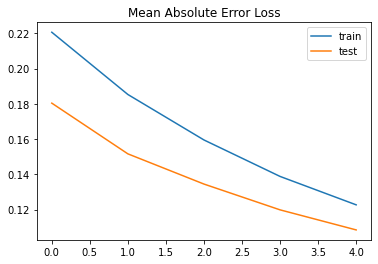

In [60]:
# plot loss during training
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend()
plt.show()

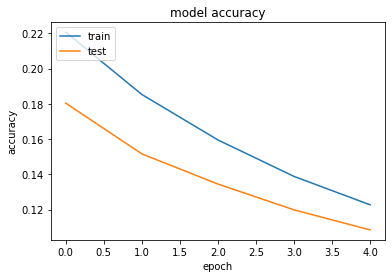

In [61]:
# plot loss during training
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')

plt.plot(result.history['mae'])
plt.plot(result.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#ANN model biluding  model2
model2=Sequential()
layer1=Dense(units=100, activation='relu',input_dim=10)
layer2=Dense(units=10, activation='relu')
layer3=Dense(units=1, activation='linear')


model2.add(layer1)
model2.add(layer2)
model2.add(layer3)

model2.summary()

model2.layers[0].get_weights()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1100      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


[array([[-0.03671788,  0.15024325,  0.12383077,  0.11902118, -0.11397485,
          0.12128401, -0.06926417,  0.09558773, -0.02665475, -0.16554788,
          0.2171672 ,  0.08721057,  0.2191593 , -0.12547424, -0.16631162,
          0.05410326, -0.22551659, -0.18634933,  0.21317983, -0.05906424,
          0.06629255,  0.12325341,  0.19499162, -0.21346186,  0.20283973,
         -0.07444037,  0.22806227,  0.08622292,  0.21666104, -0.06054512,
          0.19996473,  0.02676088,  0.17998776,  0.12957275, -0.22587763,
          0.09261456,  0.08336517, -0.11197461, -0.13064075,  0.22343037,
          0.04638845, -0.02559817,  0.06991467, -0.1060203 , -0.03442314,
         -0.22928101, -0.05323394,  0.16574746,  0.10721532, -0.10341431,
         -0.17934753,  0.08410743, -0.20982406, -0.16076526, -0.13280323,
          0.01463217,  0.22297972, -0.01954365, -0.08509652,  0.00270879,
          0.14712942,  0.06265488,  0.03877255,  0.15887773,  0.01097102,
         -0.06136627, -0.12014364, -0.

In [20]:
model2.compile(loss='mae',optimizer="SGD")

model2.fit(X_train,y_train,verbose=1,epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nilay\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 7)


In [ ]:


model2.layers[0].get_weights()